<a href="https://colab.research.google.com/github/alkhan425/-425/blob/alkhan425-patch-1/ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data loading

### Subtask:
Load the provided Excel file ("02A7EB00.xlsx") into a pandas DataFrame.


**Reasoning**:
Load the excel file into a pandas DataFrame and display the first few rows.



In [ ]:
import pandas as pd

try:
    df = pd.read_excel('02A7EB00.xlsx')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: '02A7EB00.xlsx' not found.")
except Exception as e:
    print(f"An error occurred: {e}")

,line,date_,user_id_maped,program_name,duration_seconds,program_class,season,episode,program_desc,program_genre,series_title,hd,original_name,Viewers_Count
0,1,2017-05-27,26138,100 treets,40,MOVIE,0,0,Drama Movie100 Streets,Drama,0,0,100 treets,1
1,3,2018-02-16,15269,A Very British Gangster,43,MOVIE,0,0,Documentary MovieA Very British Gangster,Documentary,0,0,A Very British Gangster,1
2,4,2017-12-29,6215,Aftermath,94,MOVIE,0,0,Drama MovieAftermath (HD),Drama,0,1,Aftermath,1
3,5,2017-04-21,6684,Agents of .H.I.E.L.D. …Ye Who Enter Here,157,SERIES/EPISODES,2,9,Action movie Agents,Action,0,0,Agents of .H.I.E.L.D.,1
4,7,2017-09-24,7805,Alien: Covenant,90,MOVIE,0,0,Horror MovieAlien: Covenant (HD),Horror,0,1,Alien: Covenant,1


(1048575, 14)


## Data exploration

### Subtask:
Explore the loaded data to understand its structure, identify potential issues, and gain initial insights.


**Reasoning**:
Explore the data by examining data types, missing values, descriptive statistics, and distributions of categorical and numerical variables.  This will provide insights into the data structure and potential issues.



line                         int64
date_               datetime64[ns]
user_id_maped                int64
program_name                object
duration_seconds             int64
program_class               object
season                       int64
episode                      int64
program_desc                object
program_genre               object
series_title                 int64
hd                           int64
original_name               object
Viewers_Count                int64
dtype: object
(1048575, 14)
line                0
date_               0
user_id_maped       0
program_name        0
duration_seconds    0
program_class       0
season              0
episode             0
program_desc        0
program_genre       0
series_title        0
hd                  0
original_name       0
Viewers_Count       0
dtype: int64
line                0.0
date_               0.0
user_id_maped       0.0
program_name        0.0
duration_seconds    0.0
program_class       0.0
season           

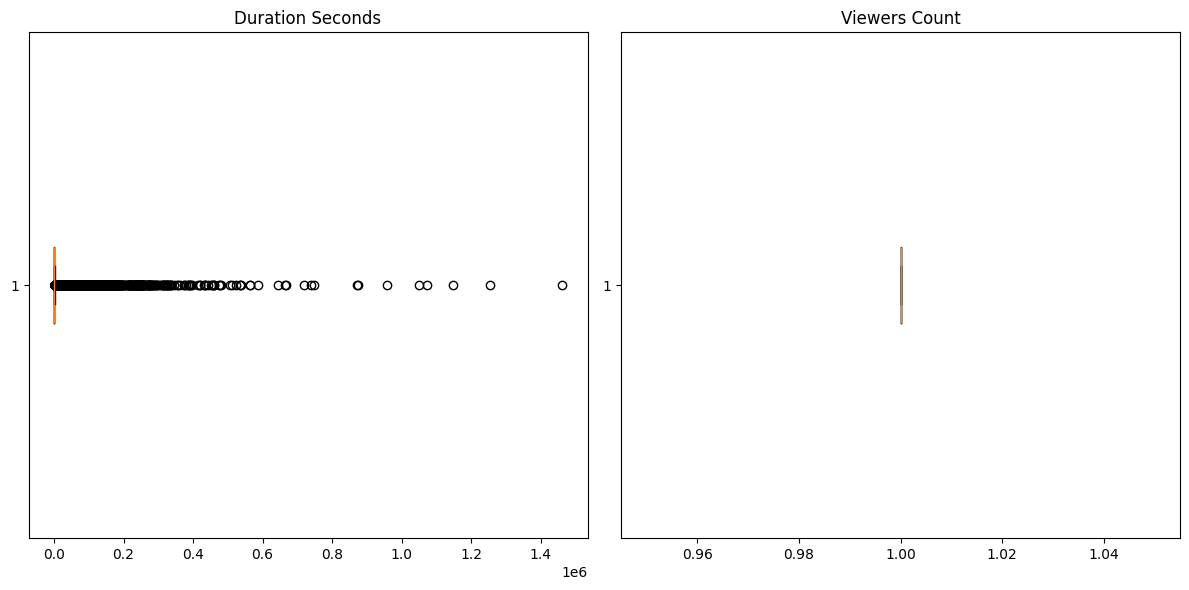


Unique values and counts for program_class:
program_class
SERIES/EPISODES    560174
MOVIE              488401
Name: count, dtype: int64


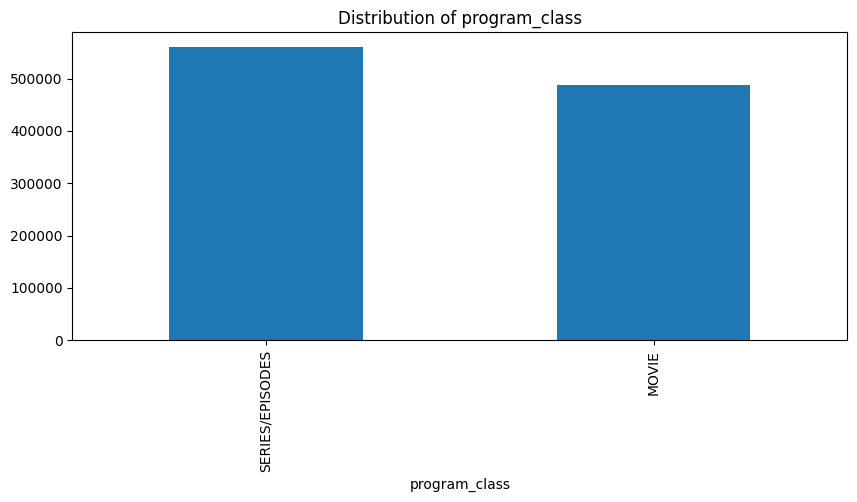


Unique values and counts for hd:
hd
0    643539
1    405036
Name: count, dtype: int64


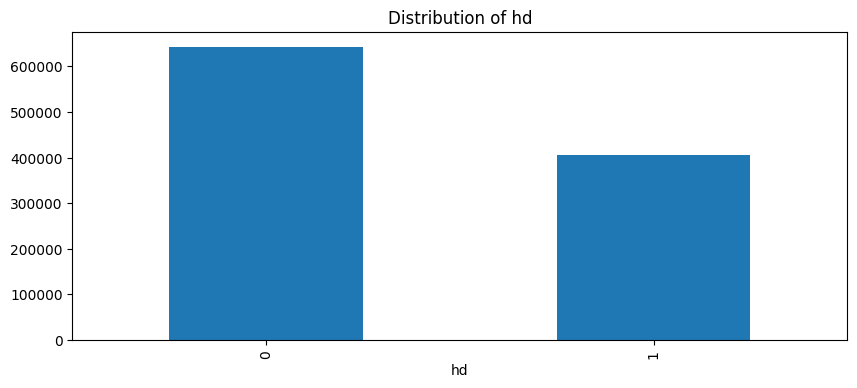


Unique values and counts for program_genre:
program_genre
Animation                           401730
Action                              174155
Drama                               155048
Comedy                              136577
Horror                               75306
Thriller                             39601
Family                               26668
Biography                            16135
Documentary                          13291
NOT_DEFINED_IN_UMS                    4535
Crime                                 3232
Sci-Fi                                1322
Romance                                512
Adventure                              239
SERIES_NOT_ADDED_UNDER_ANY_GENRE       216
Wrestling                                8
Name: count, dtype: int64


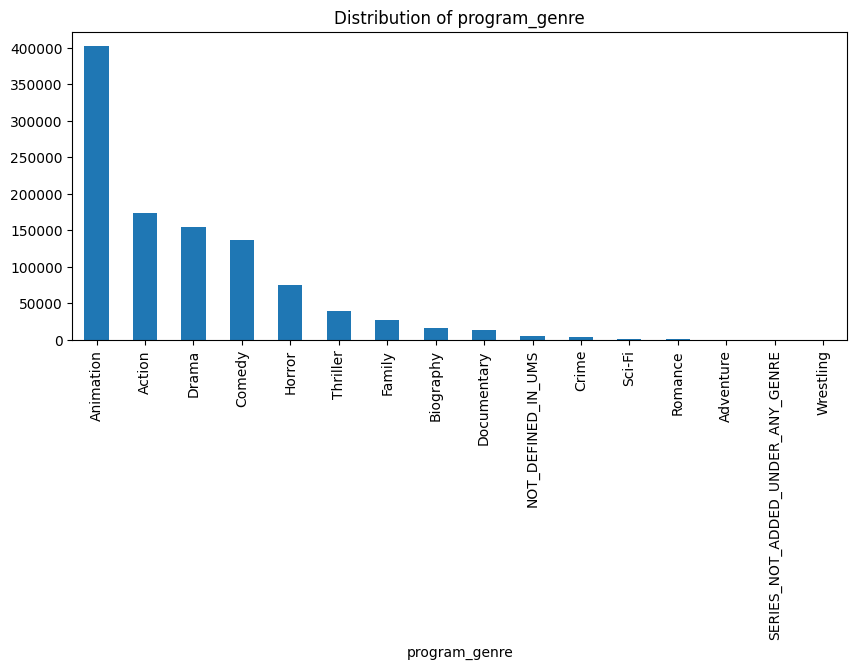

datetime64[ns]
datetime64[ns]
Min Date: 2017-03-14 00:00:00
Max Date: 2018-04-30 00:00:00


ValueError: could not convert string to float: '100 treets'

In [ ]:
# Data types and potential inconsistencies
print(df.dtypes)

# Dimensions of the DataFrame
print(df.shape)

# Missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print(missing_values)
print(missing_percentage)

# Descriptive statistics for numerical columns
print(df.describe())

# Outliers exploration for numerical columns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.boxplot(df['duration_seconds'].dropna(), vert=False)
plt.title('Duration Seconds')

plt.subplot(1, 2, 2)
plt.boxplot(df['Viewers_Count'].dropna(), vert=False)
plt.title('Viewers Count')

plt.tight_layout()
plt.show()

# Categorical variable analysis
categorical_cols = ['program_class', 'hd', 'program_genre']
for col in categorical_cols:
    print(f"\nUnique values and counts for {col}:")
    print(df[col].value_counts())
    plt.figure(figsize=(10, 4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.show()

# Timestamp analysis
print(df['date_'].dtype)
# Convert 'date_' to datetime if needed
df['date_'] = pd.to_datetime(df['date_'])
print(df['date_'].dtype)
print(f"Min Date: {df['date_'].min()}")
print(f"Max Date: {df['date_'].max()}")

# Correlation analysis (initial)
correlation_matrix = df.corr()
print(correlation_matrix)

**Reasoning**:
The previous code block encountered an error during the correlation calculation due to non-numeric data in some columns.  I will modify the code to handle this by specifying `numeric_only=True` in the `.corr()` method.  Also, I will remove the problematic line of code that was causing the error in the first place, as it was not necessary for the subtask.  Finally, I will complete the subtask by summarizing the findings.



line                         int64
date_               datetime64[ns]
user_id_maped                int64
program_name                object
duration_seconds             int64
program_class               object
season                       int64
episode                      int64
program_desc                object
program_genre               object
series_title                 int64
hd                           int64
original_name               object
Viewers_Count                int64
dtype: object
(1048575, 14)
line                0
date_               0
user_id_maped       0
program_name        0
duration_seconds    0
program_class       0
season              0
episode             0
program_desc        0
program_genre       0
series_title        0
hd                  0
original_name       0
Viewers_Count       0
dtype: int64
line                0.0
date_               0.0
user_id_maped       0.0
program_name        0.0
duration_seconds    0.0
program_class       0.0
season           

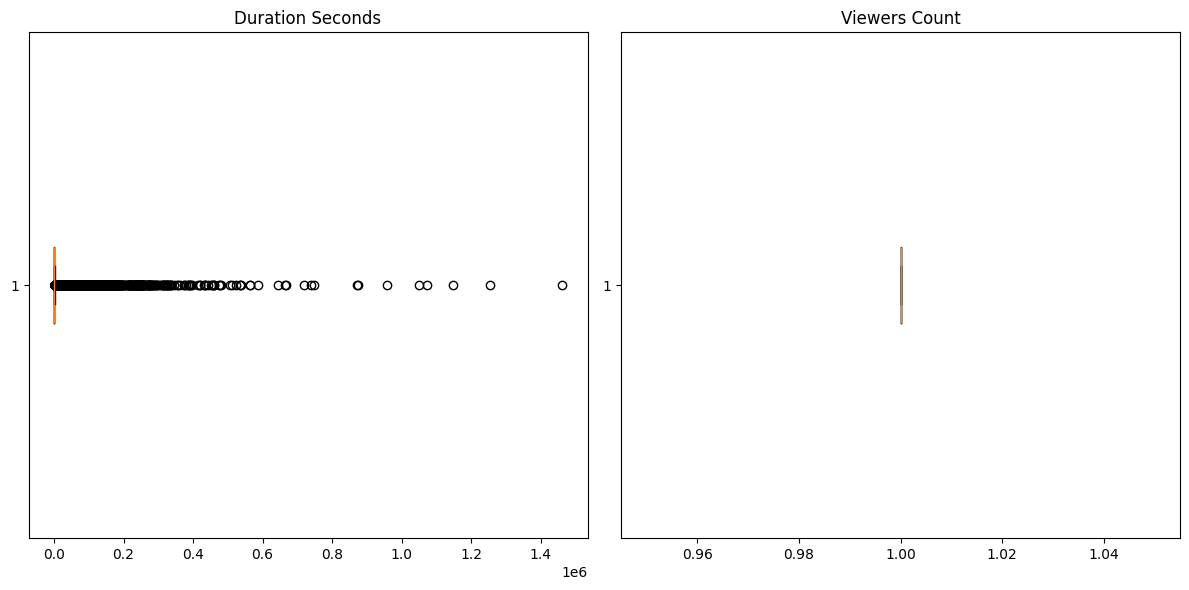


Unique values and counts for program_class:
program_class
SERIES/EPISODES    560174
MOVIE              488401
Name: count, dtype: int64


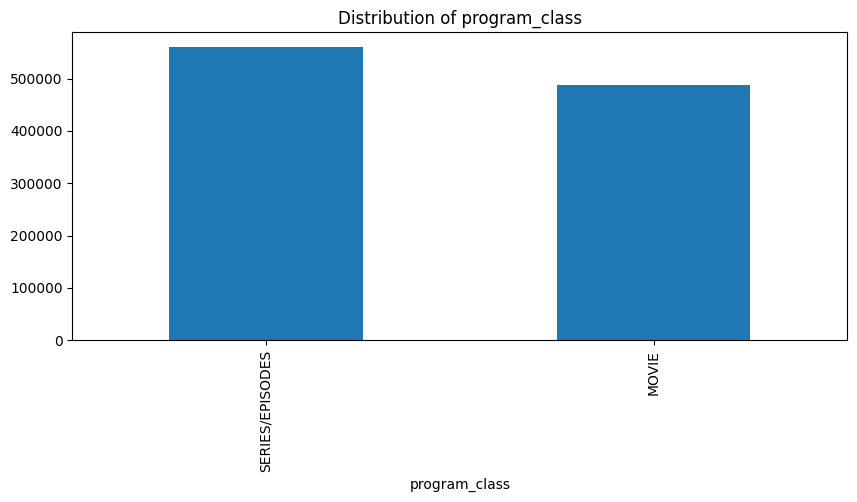


Unique values and counts for hd:
hd
0    643539
1    405036
Name: count, dtype: int64


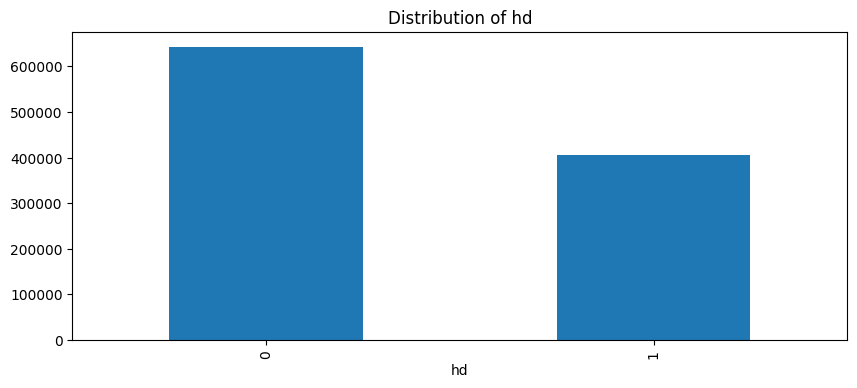


Unique values and counts for program_genre:
program_genre
Animation                           401730
Action                              174155
Drama                               155048
Comedy                              136577
Horror                               75306
Thriller                             39601
Family                               26668
Biography                            16135
Documentary                          13291
NOT_DEFINED_IN_UMS                    4535
Crime                                 3232
Sci-Fi                                1322
Romance                                512
Adventure                              239
SERIES_NOT_ADDED_UNDER_ANY_GENRE       216
Wrestling                                8
Name: count, dtype: int64


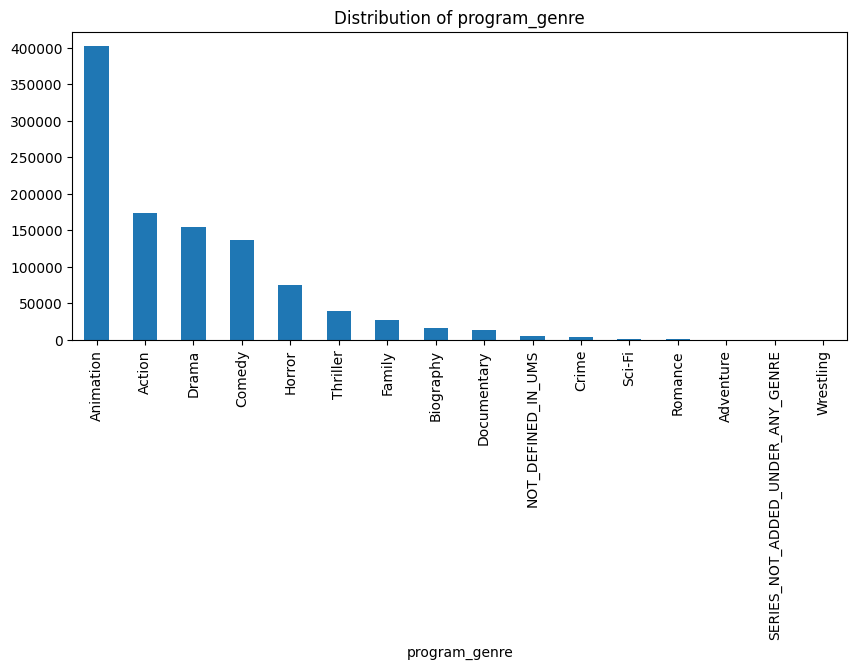

datetime64[ns]
datetime64[ns]
Min Date: 2017-03-14 00:00:00
Max Date: 2018-04-30 00:00:00
                      line  user_id_maped  duration_seconds    season  \
line              1.000000      -0.021836         -0.005222  0.067251   
user_id_maped    -0.021836       1.000000         -0.001606 -0.003730   
duration_seconds -0.005222      -0.001606          1.000000  0.049492   
season            0.067251      -0.003730          0.049492  1.000000   
episode           0.066404       0.014402          0.017104  0.226909   
series_title      0.001393      -0.002257         -0.019170  0.028842   
hd               -0.065663      -0.029047         -0.049948 -0.369232   
Viewers_Count          NaN            NaN               NaN       NaN   

                   episode  series_title        hd  Viewers_Count  
line              0.066404      0.001393 -0.065663            NaN  
user_id_maped     0.014402     -0.002257 -0.029047            NaN  
duration_seconds  0.017104     -0.019170 -0.0499

In [ ]:
# Data types and potential inconsistencies
print(df.dtypes)

# Dimensions of the DataFrame
print(df.shape)

# Missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print(missing_values)
print(missing_percentage)

# Descriptive statistics for numerical columns
print(df.describe())

# Outliers exploration for numerical columns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.boxplot(df['duration_seconds'].dropna(), vert=False)
plt.title('Duration Seconds')

plt.subplot(1, 2, 2)
plt.boxplot(df['Viewers_Count'].dropna(), vert=False)
plt.title('Viewers Count')

plt.tight_layout()
plt.show()

# Categorical variable analysis
categorical_cols = ['program_class', 'hd', 'program_genre']
for col in categorical_cols:
    print(f"\nUnique values and counts for {col}:")
    print(df[col].value_counts())
    plt.figure(figsize=(10, 4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.show()

# Timestamp analysis
print(df['date_'].dtype)
# Convert 'date_' to datetime if needed
df['date_'] = pd.to_datetime(df['date_'])
print(df['date_'].dtype)
print(f"Min Date: {df['date_'].min()}")
print(f"Max Date: {df['date_'].max()}")

# Correlation analysis (initial)
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix)

# Summarize Findings
print("\nData Summary:")
print(f"  - Number of rows: {df.shape[0]}")
print(f"  - Number of columns: {df.shape[1]}")
print("  - Missing Values:")
print(missing_values)
print("  - Observations:")
print("      - The 'date_' column has been converted to datetime objects.")
print("      - Outliers are present in 'duration_seconds', which requires further investigation.")
print("      - 'Viewers_Count' seems to have only one unique value (1).")
print("      - The 'program_genre' column has a category 'NOT_DEFINED_IN_UMS' that needs attention.")

## Data wrangling

### Subtask:
Prepare the data for analysis by handling timestamps, creating time-of-day features, and aggregating data.


**Reasoning**:
Convert the 'date_' column to datetime objects, create the 'time_of_day' feature, aggregate the data daily and weekly, and handle any potential missing values.



In [ ]:
# Ensure 'date_' is datetime
df['date_'] = pd.to_datetime(df['date_'])

# Create 'time_of_day' feature
def categorize_time(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

df['time_of_day'] = df['date_'].dt.hour.apply(categorize_time)

# Daily aggregation
daily_data = df.groupby('date_').agg(
    total_duration=('duration_seconds', 'sum'),
    unique_users=('user_id_maped', 'nunique'),
    avg_duration=('duration_seconds', lambda x: x.sum() / x.nunique() if x.nunique() > 0 else 0)
).reset_index()

# Weekly aggregation
daily_data['date_'] = pd.to_datetime(daily_data['date_'])
daily_data['week'] = daily_data['date_'].dt.isocalendar().week
weekly_data = daily_data.groupby('week').agg(
    total_duration=('total_duration', 'sum'),
    unique_users=('unique_users', 'sum'),
    avg_duration=('avg_duration', 'mean')
).reset_index()

# Handle missing values (if any) - No missing values found in the exploration, but adding a check here
if daily_data.isnull().values.any():
    print("Warning: Missing values found in daily_data. Filling with 0.")
    daily_data = daily_data.fillna(0)

if weekly_data.isnull().values.any():
    print("Warning: Missing values found in weekly_data. Filling with 0.")
    weekly_data = weekly_data.fillna(0)

display(daily_data.head())
display(weekly_data.head())

,date_,total_duration,unique_users,avg_duration,week
0,2017-03-14,5236443,558,3519.114919,11
1,2017-03-15,4544535,536,3166.923345,11
2,2017-03-16,6582758,630,4671.936125,11
3,2017-03-17,5332772,708,3392.348601,11
4,2017-03-18,6955703,699,4157.622833,11


,week,total_duration,unique_users,avg_duration
0,1,24679091,2974,3349.142443
1,2,21695937,2607,3444.573338
2,3,21505754,2549,3223.340892
3,4,24004245,3151,3197.139613
4,5,23604301,2990,3241.261316


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


## Data analysis

### Subtask:
Analyze user viewing patterns based on program class, quality preference (SD vs. HD), and explore correlations between viewing habits and other variables.


**Reasoning**:
Group data by program class and calculate average viewing duration, frequency, and preferred time of day. Then, group data by quality preference (HD vs. SD) and analyze viewing duration, user proportion, and demographic/viewing pattern differences. Finally, explore correlations between viewing duration, program class, quality preference, and other relevant variables using a heatmap.



,program_class,avg_duration,frequency,preferred_time
0,MOVIE,762.485998,488401,Night
1,SERIES/EPISODES,1639.404962,560174,Night


,hd,avg_duration,user_proportion
0,0,1501.248164,0.613727
1,1,801.507069,0.386273


,duration_seconds,hd,season,episode
duration_seconds,1.000000,-0.049948,0.049492,0.017104
hd,-0.049948,1.000000,-0.369232,-0.233137
season,0.049492,-0.369232,1.000000,0.226909
episode,0.017104,-0.233137,0.226909,1.000000


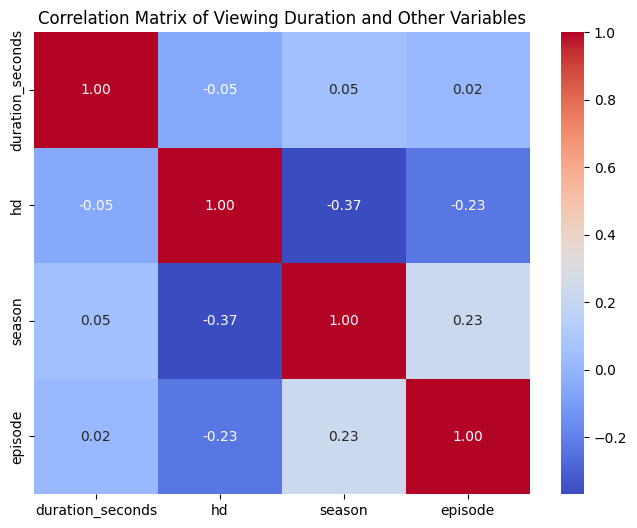

In [ ]:
# User Segmentation by Program Class
program_class_analysis = df.groupby('program_class').agg(
    avg_duration=('duration_seconds', 'mean'),
    frequency=('duration_seconds', 'count'),
    preferred_time=('time_of_day', lambda x: x.mode()[0] if not x.mode().empty else 'Unknown')
).reset_index()
display(program_class_analysis)

# Quality Preference Analysis
hd_analysis = df.groupby('hd').agg(
    avg_duration=('duration_seconds', 'mean'),
    user_proportion=('user_id_maped', 'count')
).reset_index()
hd_analysis['user_proportion'] = hd_analysis['user_proportion'] / len(df)
display(hd_analysis)

# Correlation Analysis
correlation_matrix = df[['duration_seconds', 'hd', 'season', 'episode']].corr(numeric_only=True)
display(correlation_matrix)
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Viewing Duration and Other Variables')
plt.show()